# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
Some columns' types ('course_id' and 'pre_score') don't match the types mentioned in the table so I changed them as mentioned there.

The column 'pre_score' has a special character (-). I replaced it with '0' before converting its type.

The column 'department' contains a value 'Math' that doesn't match the description 'Mathematics'. I changed it to 'Mathematics'.

Only columns 'post_score' and 'pre_requirement' have missing values that I changed as mentioned in the table.

In [1]:
import pandas as pd
import numpy as np

In [2]:
uni = pd.read_csv('university_enrollment_2306.csv')

In [3]:
uni.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [4]:
uni.shape

(1850, 8)

In [5]:
uni.dtypes

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

In [6]:
# We should change the types of course_id and pre_score
uni['course_id'] = uni['course_id'].astype('object')

In [7]:
uni.dtypes

course_id            object
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

In [8]:
uni['pre_score'][uni['pre_score'].str.contains('-') == True].shape

(130,)

In [9]:
uni['pre_score'].loc[uni['pre_score'].str.contains('-') == True] = '0'

In [10]:
uni['pre_score'][uni['pre_score'].str.contains('-')==True].shape

(0,)

In [11]:
uni['pre_score'] = uni['pre_score'].astype('float')

In [12]:
uni.dtypes

course_id            object
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object

In [13]:
uni['course_type'].value_counts()

online       1375
classroom     475
Name: course_type, dtype: int64

In [14]:
uni['year'].sort_values().unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [15]:
uni['pre_requirement'].value_counts()

None            802
Beginner        654
Intermediate    305
Name: pre_requirement, dtype: int64

In [16]:
uni['department'].value_counts()

Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: department, dtype: int64

In [17]:
# Change Math to Mathematics in the department column
uni['department'].loc[uni['department'] == 'Math'] = 'Mathematics'

In [18]:
uni['department'].value_counts()

Technology     719
Science        472
Mathematics    440
Engineering    219
Name: department, dtype: int64

In [19]:
uni.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

In [20]:
uni['post_score'] = uni['post_score'].fillna(0)

In [21]:
uni['pre_requirement'] = uni['pre_requirement'].fillna('None')

In [22]:
uni.isnull().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

## Task 2
- The distribution exhibits relatively low variability, with a standard deviation of approximately 36.99, suggesting that the majority of courses fall within a reasonably tight range around the mean.
- The minimum enrollment count observed in the dataset is 154, representing the lowest enrollment among the courses, while the maximum enrollment count is 267, indicating the highest enrollment.
- The median enrollment count, at 251, represents the point at which 50% of the courses have fewer enrollments, and 50% have more.
- The majority of enrollment counts are likely to be in the range of 230 to 270 (the higher_count range)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

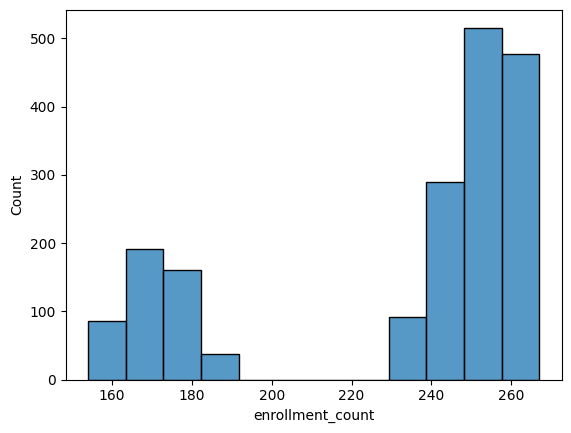

In [24]:
sns.histplot(uni['enrollment_count'])
plt.show()

In [25]:
uni['enrollment_count'].describe()

count    1850.000000
mean      231.565405
std        36.987029
min       154.000000
25%       185.000000
50%       251.000000
75%       261.000000
max       267.000000
Name: enrollment_count, dtype: float64

## Task 3
The 'online' course type has very high instances (around 1400) compared to the 'classroom' course type (around 430), so we can conclude that the observations are not balanced across the types.

<AxesSubplot: xlabel='course_type', ylabel='count'>

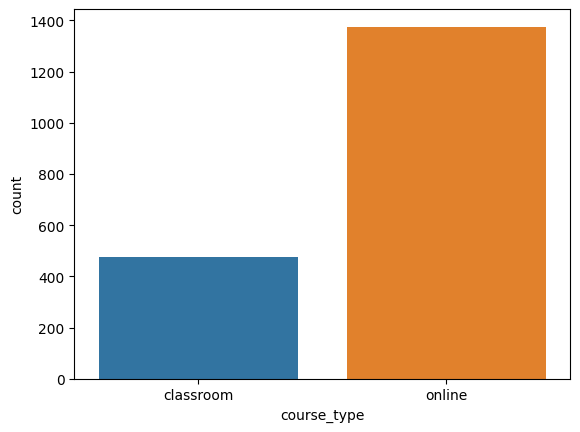

In [26]:
sns.countplot(x='course_type', data=uni)

## Task 4
The counts of the classroom course type enrollments are very low (between 150 and 190) compared to those of the online course type enrollments (between 230 and 270).

<AxesSubplot: xlabel='course_type', ylabel='enrollment_count'>

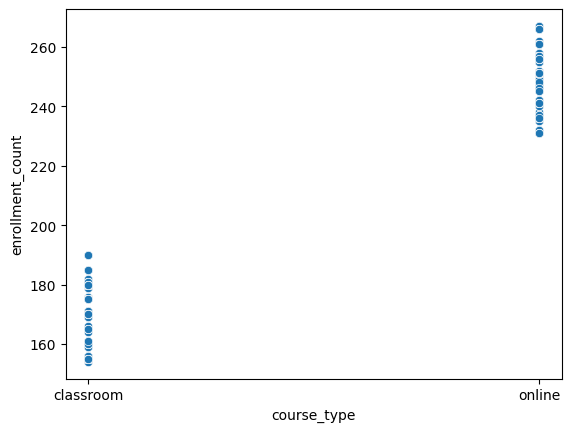

In [27]:
sns.scatterplot(x='course_type', y='enrollment_count', data=uni)

## Task 5
Since the number of enrollments is related to the course type, I think that predicting how many students will enroll in a course is a regression problem.

## Task 6
I transformed the columns in the dataset by first encoding categorical variables ("course_type", "pre_requirement", "department") into numerical values using label encoding, making them suitable for machine learning models. I also scaled numerical features ("year", "pre_score", "post_score") to ensure they have consistent scales, which can help models converge faster. After preprocessing the data, I splited it using into train and test data using train_test_split. I, finally, chose to perform modeling using linear regression.

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [29]:
uni.dtypes

course_id            object
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object

In [30]:
# Label encoding categorical variables

# Create a copy of the original DataFrame
uni_transformed = uni.copy()

# Specify the columns you wish to encode
columns_to_encode = ["course_type", "pre_requirement", "department"]

# Initialize the LabelEncoder
le = LabelEncoder()

# Iterate through the columns and encode each one
for column in columns_to_encode:
    uni_transformed[column + "_enc"] = le.fit_transform(uni_transformed[column])

# Drop unecessary columns
uni_transformed = uni_transformed.drop(["course_type", "pre_requirement", "department" ], axis=1)

In [31]:
uni_transformed.dtypes

course_id               object
year                     int64
enrollment_count         int64
pre_score              float64
post_score             float64
course_type_enc          int64
pre_requirement_enc      int64
department_enc           int64
dtype: object

In [32]:
uni_transformed.head()

,course_id,year,enrollment_count,pre_score,post_score,course_type_enc,pre_requirement_enc,department_enc
0,1,2018,165,28.14,73.0,0,0,2
1,2,2020,175,79.68,86.0,0,2,2
2,3,2016,257,57.24,80.0,1,2,1
3,4,2013,251,97.67,75.0,1,0,3
4,5,2019,165,39.75,76.0,0,0,2


In [33]:
# Normalize numerical columns

# Specify the columns you wish to normalize
columns_to_normalize = ["year", "pre_score", "post_score"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Iterate through the columns and normalize each one
for column in columns_to_normalize:
    uni_transformed[column + "_norm"] = scaler.fit_transform(uni_transformed[[column]])

# Drop unecessary columns
uni_transformed = uni_transformed.drop(["year","pre_score", "post_score"], axis=1)

In [34]:
uni_transformed.dtypes

course_id               object
enrollment_count         int64
course_type_enc          int64
pre_requirement_enc      int64
department_enc           int64
year_norm              float64
pre_score_norm         float64
post_score_norm        float64
dtype: object

In [35]:
uni_transformed.head()

,course_id,enrollment_count,course_type_enc,pre_requirement_enc,department_enc,year_norm,pre_score_norm,post_score_norm
0,1,165,0,0,2,0.636364,0.2814,0.695238
1,2,175,0,2,2,0.818182,0.7968,0.819048
2,3,257,1,2,1,0.454545,0.5724,0.761905
3,4,251,1,0,3,0.181818,0.9767,0.714286
4,5,165,0,0,2,0.727273,0.3975,0.723810


In [36]:
# Split data
X = uni_transformed.drop(['course_id','enrollment_count'], axis=1).values
y = uni_transformed['enrollment_count'].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Create a Linear Regression model
linreg_model = LinearRegression()

# Fit the model on the training data
linreg_model.fit(X_train, y_train)

# Predict the outcomes on the test set
predicted_values_linreg = linreg_model.predict(X_test)
y_pred_linreg = np.round(predicted_values_linreg).astype(int)

## Task 7
RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Create a RandomForestRegressor object with the parameters above
rf = RandomForestRegressor()

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
predicted_values_rf = rf.predict(X_test)
y_pred_rf = np.round(predicted_values_rf).astype(int)

## Task 8
I chose the baseline method linear regression because it's a widely-used regression technique. It assumes a linear relationship between the input features and the target variable enrollment_count. Since we found out above that there is a relationship between the course_type variable and enrollment_count I thought that this is the perfect method.

I chose the RandomForestRegressor as an alternative to linear regression because it offers several advantages for predicting enrollment counts in our dataset. While linear regression assumes a linear relationship between features and the target variable, RandomForestRegressor can capture more complex and non-linear patterns.

## Task 9
To calculate the performance of the models we will be using these metrics:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- r2_score

In [40]:
from sklearn import metrics

In [41]:
# Evaluate performance with error metrics for the Linear Regression
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_linreg))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_linreg))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)))
print("r2_score:", metrics.r2_score(y_test, y_pred_linreg))

Mean Absolute Error: 5.627027027027027
Mean Squared Error: 56.65045045045045
Root Mean Squared Error: 7.526649350836696
r2_score: 0.9565782535405942


In [42]:
# Evaluate performance with error metrics for the RandomForestRegression
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("r2_score:", metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.11531531531531532
Mean Squared Error: 0.12612612612612611
Root Mean Squared Error: 0.3551424026022887
r2_score: 0.9999033261584505


## Task 10
The Random Forest model achieved an outstanding performance with very low errors. The R-squared score of 0.9999 indicates an almost perfect fit to the data, suggesting that the model can explain nearly all the variance in enrollment counts. The MAE and RMSE are extremely low, indicating very accurate predictions.

Linear Regression performed reasonably well, but its performance metrics are noticeably worse than those of the Random Forest model. The R-squared score of 0.9566 suggests a strong linear relationship, but it doesn't capture the complexities in the data as effectively as the Random Forest model. The MAE and RMSE are higher, indicating larger prediction errors compared to the Random Forest model.